#Vacinação contra a COVID-19

##1. Introdução
Este relatório tem como objetivo analisar a progressão da vacinação contra a COVID-19 nos diferentes países, utilizando o banco de dados disponível no Kaggle (https://www.kaggle.com/gpreda/covid-world-vaccination-progress?select=country_vaccinations.csv).

##2. Importação dos pacotes e dos arquivos .csv
Serão importados os pacotes Pandas e Matplotlib para as análises. Os arquivos .csv carregados apresentam a vacinação por país e por fabricante.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:

vacinas_pais = pd.read_csv('country_vaccinations.csv', parse_dates=['date'])
vacinas_pais

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29407,Zimbabwe,ZWE,2021-07-01,1341960.0,782698.0,559262.0,9522.0,21235.0,9.03,5.27,3.76,1429.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1412138853...
29408,Zimbabwe,ZWE,2021-07-02,1352718.0,788004.0,564714.0,10758.0,18686.0,9.10,5.30,3.80,1257.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1412138853...
29409,Zimbabwe,ZWE,2021-07-03,1359587.0,791901.0,567686.0,6869.0,15726.0,9.15,5.33,3.82,1058.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1412138853...
29410,Zimbabwe,ZWE,2021-07-04,1361210.0,793077.0,568133.0,1623.0,12279.0,9.16,5.34,3.82,826.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1412138853...


In [139]:
vacinas_fabricante = pd.read_csv('country_vaccinations_by_manufacturer.csv', parse_dates=['date'])
vacinas_fabricante

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30938
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
8633,Uruguay,2021-07-05,Pfizer/BioNTech,1024793
8634,Uruguay,2021-07-05,Sinovac,3045997
8635,Uruguay,2021-07-06,Oxford/AstraZeneca,43245
8636,Uruguay,2021-07-06,Pfizer/BioNTech,1038942


##3. Análise inicial dos bancos de dados
  Nesta seção, será realizada a verificação dos tipos de dados e descrição estatística inicial.

###3.1. Vacinação por país
  217 países ou territórios apresentaram resultados de vacinação em sua população. Os países com a maior quantidade diária média de vacinados por milhão são as Ilhas Cook, Falkland e Santa Helena. A baixa extensão territorial desses territórios pode explicar esse indicador elevado.
  Desconsiderando os valores nulos, os piores países em quantidade diária média de vacinados por milhão são a República Democrática do Congo e Chade.

In [140]:
vacinas_pais.dtypes

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

In [141]:
vacinas_pais['country'].unique().shape

(217,)

In [142]:
vacinas_pais.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.639300e+04,1.556100e+04,1.283000e+04,1.352400e+04,2.917100e+04,16393.000000,15561.000000,12830.000000,29171.000000
mean,1.094522e+07,5.341596e+06,3.041824e+06,2.230492e+05,1.122094e+05,27.294751,18.047456,11.262784,3376.552466
std,5.910068e+07,1.997982e+07,1.178863e+07,1.263608e+06,8.438880e+05,33.387913,20.014631,14.902168,4488.337095
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.176960e+05,9.026700e+04,4.400600e+04,4.228250e+03,8.460000e+02,2.720000,2.350000,1.170000,393.000000
50%,8.241700e+05,5.981360e+05,3.350540e+05,2.103100e+04,6.355000e+03,13.270000,9.810000,4.930000,1804.000000
75%,3.842474e+06,2.553837e+06,1.455536e+06,9.126575e+04,3.484350e+04,40.530000,28.570000,15.317500,5051.000000
max,1.331669e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,231.890000,116.530000,115.360000,118759.000000


In [143]:
vacinas_pais.groupby('country')['daily_vaccinations_per_million'].describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Cook Islands,35.0,25607.542857,10217.268852,9850.0,16739.00,25962.0,31940.00,46231.0
Falkland Islands,66.0,21459.424242,20386.833625,3445.0,4020.00,8613.0,43497.25,54264.0
Saint Helena,91.0,13970.417582,3343.680647,10048.0,12354.00,12354.0,15978.00,27178.0
Gibraltar,173.0,13840.693642,9666.760739,237.0,5165.00,12971.0,22944.00,31700.0
Cuba,34.0,12551.647059,2645.124800,8577.0,9985.25,12709.0,14914.50,16429.0
...,...,...,...,...,...,...,...,...
Chad,25.0,19.600000,7.477745,12.0,17.00,17.0,17.00,42.0
Democratic Republic of Congo,78.0,9.102564,5.387792,3.0,4.00,9.0,12.00,24.0
Pitcairn,6.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


###3.2. Vacinação por fabricante

Apenas 33 países forneceram dados de vacinação por fabricante para esse banco de dados. A Islândia e a Alemanha foram os países que apresentaram dados mais detalhados, com informações diárias desde 27/12/2020 até 05/07/2021, data da última atualização do banco de dados.

In [144]:
vacinas_fabricante.dtypes

location                      object
date                  datetime64[ns]
vaccine                       object
total_vaccinations             int64
dtype: object

In [145]:
vacinas_fabricante['location'].unique().shape

(33,)

In [146]:
vacinas_fabricante['location'].value_counts()

Iceland          764
Germany          764
Italy            610
Lithuania        599
Czechia          589
France           588
Latvia           580
Romania          541
United States    454
Chile            453
Uruguay          390
Switzerland      282
Japan            165
Hungary          128
Netherlands      112
Poland           112
Finland          111
Slovakia         109
Austria          108
Spain            104
Portugal          99
Croatia           99
Ireland           94
Luxembourg        92
Bulgaria          91
Belgium           88
Estonia           85
Cyprus            80
Denmark           79
Slovenia          77
Malta             75
Sweden            74
Liechtenstein     42
Name: location, dtype: int64

In [147]:
vacinas_fabricante[vacinas_fabricante['location']=='Germany']['date'].unique()

array(['2020-12-27T00:00:00.000000000', '2020-12-28T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-01-02T00:00:00.000000000', '2021-01-03T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-09T00:00:00.000000000',
       '2021-01-10T00:00:00.000000000', '2021-01-11T00:00:00.000000000',
       '2021-01-12T00:00:00.000000000', '2021-01-13T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-01-15T00:00:00.000000000',
       '2021-01-16T00:00:00.000000000', '2021-01-17T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-19T00:00:00.000000000',
       '2021-01-20T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-22T00:00:00.000000000', '2021-01-23

##4. Análise descritiva e gráficos
Nesta seção, será realizada uma análise mais aprofundada, assim como serão apresentados gráficos que facilitam a extração de informações do banco de dados. 

###4.1. Vacinação por país


A vacinação iniciou-se em dezembro de 2020, representado pelo mês 12 no gráfico. Ao longo de 2021, a vacinação se intensificou. O mês de julho ainda está incompleto, portanto apresenta vacinação abaixo do mês de junho.

Text(0.5, 1.0, 'Vacinação total por mês')

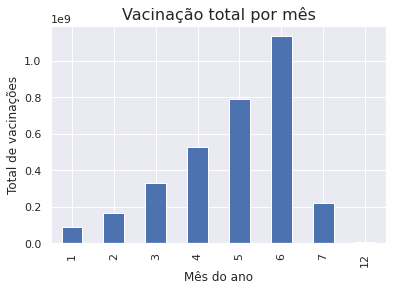

In [148]:
#Vacinação por mês
sns.set()
vacinas_mensal = vacinas_pais.groupby(vacinas_pais['date'].dt.month)['daily_vaccinations'].sum()
vacinas_mensal.plot.bar()
plt.xlabel('Mês do ano')
plt.ylabel('Total de vacinações')
plt.title('Vacinação total por mês', fontdict = {'fontsize': 16})

Verificando as vacinações diárias ao longo do mês de junho, percebe-se uma oscilação, mas com tendência de crescimento.

Text(0.5, 1.0, 'Vacinação diária nos dias do mês de junho de 2021')

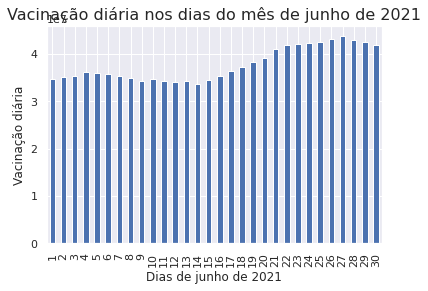

In [149]:
#Evolução por dia em junho
vacinas_junho = vacinas_pais[vacinas_pais['date'].dt.month == 6]
vacinas_junho_total = vacinas_junho.groupby(vacinas_junho['date'].dt.day)['daily_vaccinations'].sum()
vacinas_junho_total.plot.bar()
plt.xlabel('Dias de junho de 2021')
plt.ylabel('Vacinação diária')
plt.title('Vacinação diária nos dias do mês de junho de 2021', fontdict = {'fontsize': 16})

Nos Estados Unidos, percebe-se um aumento de vacinações ao longo do início do ano, com um pico de vacinações no meio de abril. Posteriormente, a vacinação se desacelera, mas nessa data o país já apresentava cerca de 40% da população vacinada com pelo menos a primeira dose. Atualmente, esse índice está em cerca de 55%.

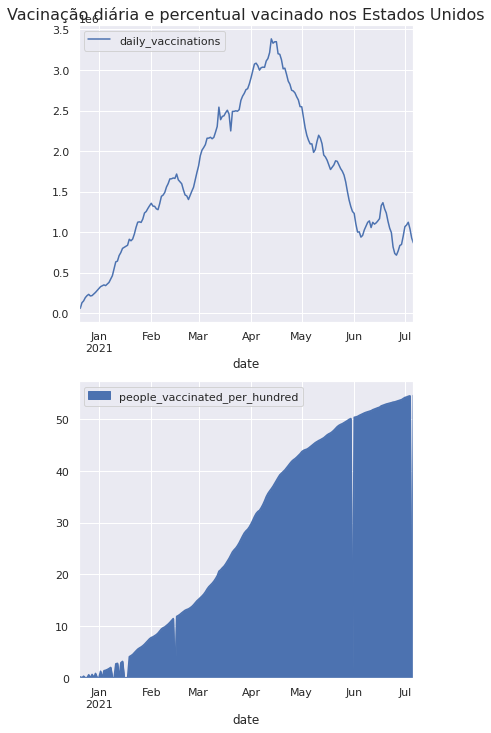

In [150]:
vacinas_EUA = vacinas_pais[vacinas_pais['country'] == 'United States']

plt.figure(figsize=(6, 12))

ax1 = plt.subplot(211)
plt.title('Vacinação diária e percentual vacinado nos Estados Unidos', fontdict = {'fontsize': 16})
vacinas_EUA.plot.line(x = 'date', y = 'daily_vaccinations', ax = ax1)
ax2 = plt.subplot(212)
vacinas_EUA.plot.area(x = 'date', y = 'people_vaccinated_per_hundred', ax = ax2)


O Reino Unido apresenta um padrão menos definido de vacinações, com picos no final de março e de maio. No começo de abril, já apresentava 50% da população vacinada com pelo menos a primeira dose. Atualmente, esse índice é de cerca de 65%.

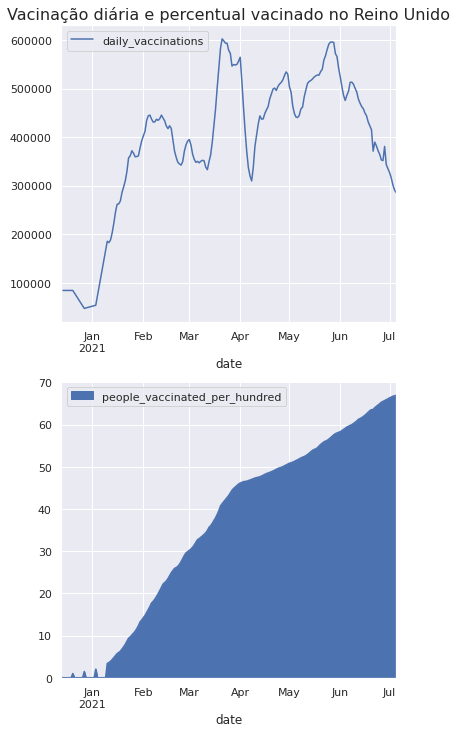

In [151]:
vacinas_UK = vacinas_pais[vacinas_pais['country'] == 'United Kingdom']

plt.figure(figsize=(6, 12))

ax1 = plt.subplot(211)
plt.title('Vacinação diária e percentual vacinado no Reino Unido', fontdict = {'fontsize': 16})
vacinas_UK.plot.line(x = 'date', y = 'daily_vaccinations', ax = ax1)
ax2 = plt.subplot(212)
vacinas_UK.plot.area(x = 'date', y = 'people_vaccinated_per_hundred', ax = ax2)

Os dados da China indicam uma aceleração da vacinação apenas no final de maio. Não há dados consolidados de população vacinada com pelo menos a primeira dose.

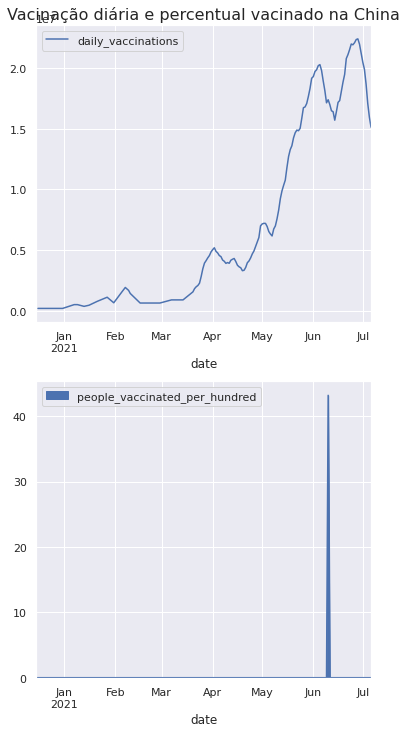

In [152]:
vacinas_china = vacinas_pais[vacinas_pais['country'] == 'China']

plt.figure(figsize=(6, 12))

ax1 = plt.subplot(211)
plt.title('Vacinação diária e percentual vacinado na China', fontdict = {'fontsize': 16})
vacinas_china.plot.line(x = 'date', y = 'daily_vaccinations', ax = ax1)
ax2 = plt.subplot(212)
vacinas_china.plot.area(x = 'date', y = 'people_vaccinated_per_hundred', ax = ax2)

Na índia, houve um pico de vacinações no começo de abril, seguida de uma desaceleração, com um novo pico no final de junho. Atualmente, apresenta 50% da população vacinada com pelo menos a primeira dose.

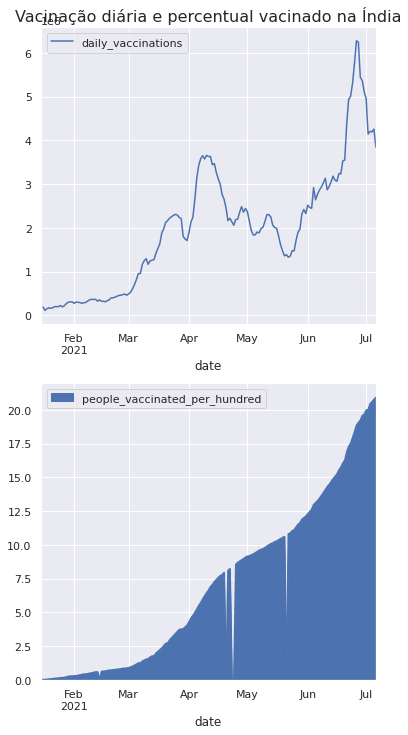

In [153]:
vacinas_india = vacinas_pais[vacinas_pais['country'] == 'India']

plt.figure(figsize=(6, 12))

ax1 = plt.subplot(211)
plt.title('Vacinação diária e percentual vacinado na Índia', fontdict = {'fontsize': 16})
vacinas_india.plot.line(x = 'date', y = 'daily_vaccinations', ax = ax1)
ax2 = plt.subplot(212)
vacinas_india.plot.area(x = 'date', y = 'people_vaccinated_per_hundred', ax = ax2)

No Chile, houve um pico de vacinações já em fevereiro e março, quando foi atingida a marca de cerca de 30% da população vacinada com pelo menos a primeira dose. Atualmente, esse índice já está em quase 70%. 

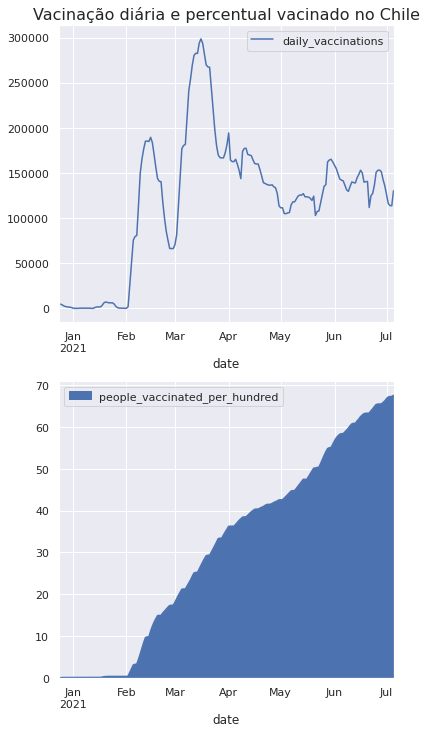

In [154]:
vacinas_chile = vacinas_pais[vacinas_pais['country'] == 'Chile']

plt.figure(figsize=(6, 12))

ax1 = plt.subplot(211)
plt.title('Vacinação diária e percentual vacinado no Chile', fontdict = {'fontsize': 16})
vacinas_chile.plot.line(x = 'date', y = 'daily_vaccinations', ax = ax1)
ax2 = plt.subplot(212)
vacinas_chile.plot.area(x = 'date', y = 'people_vaccinated_per_hundred', ax = ax2)


No Brasil, a vacinação se intensificou a partir de abril, com picos em abril, final de maio e final de junho. Os dados mais atuais indicam uma vacinação de 35% da população com pelo menos a primeira dose.

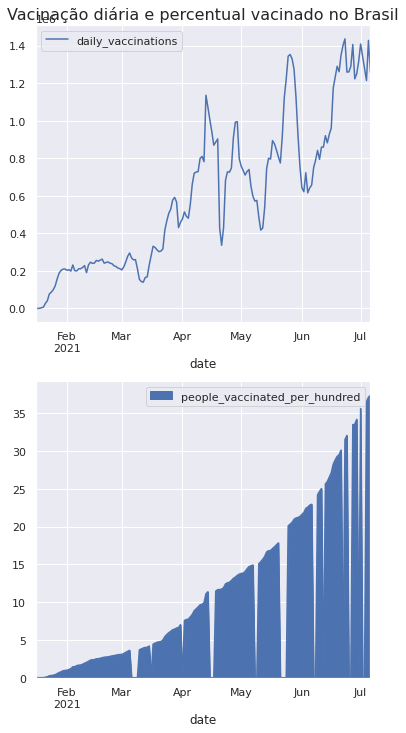

In [155]:
vacinas_brasil = vacinas_pais[vacinas_pais['country'] == 'Brazil']

plt.figure(figsize=(6, 12))

ax1 = plt.subplot(211)
plt.title('Vacinação diária e percentual vacinado no Brasil', fontdict = {'fontsize': 16})
vacinas_brasil.plot.line(x = 'date', y = 'daily_vaccinations', ax = ax1)
ax2 = plt.subplot(212)
vacinas_brasil.plot.area(x = 'date', y = 'people_vaccinated_per_hundred', ax = ax2)


###4.2. Vacinação por fabricante
Esse banco de dados apresenta a vacinação total por país e por fabricante, então primeiramente é necessário extrair somente o dado mais recente para cada país.

In [156]:
mais_recente = vacinas_fabricante.groupby(['location'])['date'].max()
mais_recente

location
Austria         2021-07-06
Belgium         2021-07-06
Bulgaria        2021-07-06
Chile           2021-07-05
Croatia         2021-07-06
Cyprus          2021-07-02
Czechia         2021-07-06
Denmark         2021-07-02
Estonia         2021-07-02
Finland         2021-07-06
France          2021-07-05
Germany         2021-07-05
Hungary         2021-07-02
Iceland         2021-07-06
Ireland         2021-07-06
Italy           2021-07-06
Japan           2021-07-05
Latvia          2021-07-06
Liechtenstein   2021-07-02
Lithuania       2021-07-06
Luxembourg      2021-07-06
Malta           2021-07-02
Netherlands     2021-07-06
Poland          2021-07-06
Portugal        2021-07-02
Romania         2021-07-05
Slovakia        2021-07-06
Slovenia        2021-06-25
Spain           2021-07-02
Sweden          2021-07-02
Switzerland     2021-07-04
United States   2021-07-04
Uruguay         2021-07-06
Name: date, dtype: datetime64[ns]

A vacina mais aplicada entre os países que apresentaram dados é a fabricada pela Pfizer/BioNTech, seguida pela vacina fabricada pela Moderna.

Text(0, 0.5, 'Total de vacinação')

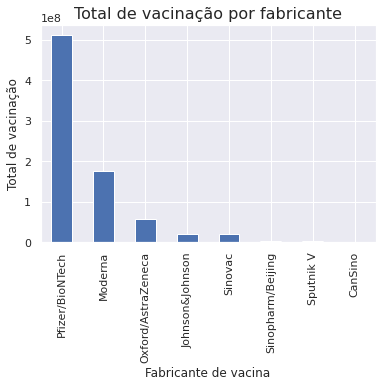

In [157]:
dataframe_recente = vacinas_fabricante[vacinas_fabricante['date'].values == mais_recente[vacinas_fabricante['location']].values]
dataframe_recente.groupby('vaccine')['total_vaccinations'].sum().sort_values(ascending = False).plot.bar()
plt.title('Total de vacinação por fabricante', fontdict = {'fontsize': 16})
plt.xlabel('Fabricante de vacina')
plt.ylabel('Total de vacinação')

Na Alemanha, a maioria das vacinas aplicadas foram fabricadas pela Pfizer, seguida da AstraZeneca.

Text(0.5, 1.0, 'Distribuição de vacinas na Alemanha por fabricante')

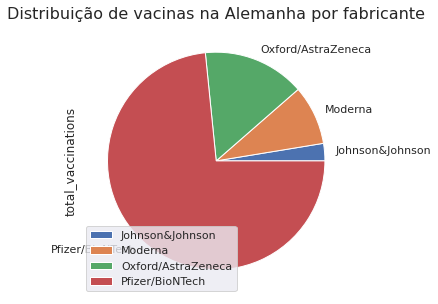

In [158]:
#Quantidade de vacinas por fabricante na Alemanha
dataframe_recente[(dataframe_recente['location']=='Germany')].set_index('vaccine').plot.pie(y='total_vaccinations', figsize=(5, 5))
plt.title("Distribuição de vacinas na Alemanha por fabricante", fontdict = {'fontsize': 16})


Na Islândia, a maioria das vacinas aplicadas foram fabricadas pela Pfizer, seguida da AstraZeneca. A AstraZeneca apresentou uma fatia de mercado maior na Islândia se comparada com a Alemanha.

Text(0.5, 1.0, 'Distribuição de vacinas na Islândia por fabricante')

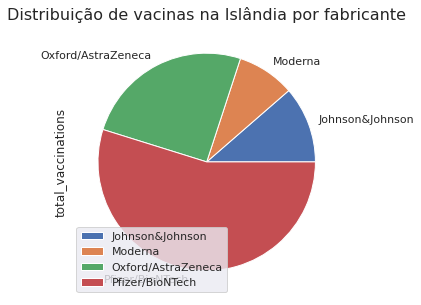

In [159]:
#Quantidade de vacinas por fabricante na Islândia
dataframe_recente[(dataframe_recente['location']=='Iceland')].set_index('vaccine').plot.pie(y='total_vaccinations', figsize=(5, 5))
plt.title("Distribuição de vacinas na Islândia por fabricante", fontdict = {'fontsize': 16})

Na Itália, a maioria das vacinas aplicadas foram fabricadas pela Pfizer, seguida da AstraZeneca. A distribuição de mercado das fabricantes de vacina na Itália foi similar a distribuição na Alemanha.

Text(0.5, 1.0, 'Distribuição de vacinas na Itália por fabricante')

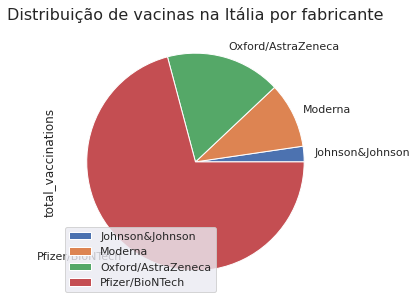

In [160]:
#Quantidade de vacinas por fabricante na Itália
dataframe_recente[(dataframe_recente['location']=='Italy')].set_index('vaccine').plot.pie(y='total_vaccinations', figsize=(5, 5))
plt.title("Distribuição de vacinas na Itália por fabricante", fontdict = {'fontsize': 16})

Já nos Estados Unidos, a posição de segunda maior fabricante fornecedora de vacinas foi assumida pela Moderna, com a Pfizer ainda na liderança.

Text(0.5, 1.0, 'Distribuição de vacinas nos Estados Unidos por fabricante')

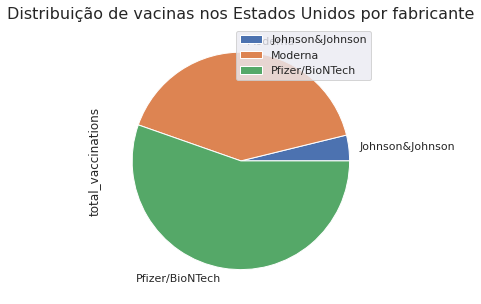

In [161]:
#Quantidade de vacinas por fabricante nos EUA
dataframe_recente[(dataframe_recente['location']=='United States')].set_index('vaccine').plot.pie(y='total_vaccinations', figsize=(5, 5))
plt.title("Distribuição de vacinas nos Estados Unidos por fabricante", fontdict = {'fontsize': 16})

No Chile, a Pfizer perde a liderança de fornecimento de vacinas que foi observada nos demais países. A Sinovac se apresenta como a maior fornecedora de vacinas.

Text(0.5, 1.0, 'Distribuição de vacinas no Chile por fabricante')

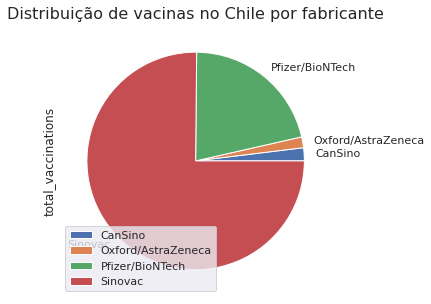

In [162]:
#Quantidade de vacinas por fabricante no Chile
dataframe_recente[(dataframe_recente['location']=='Chile')].set_index('vaccine').plot.pie(y='total_vaccinations', figsize=(5, 5))
plt.title("Distribuição de vacinas no Chile por fabricante", fontdict = {'fontsize': 16})

##5. Conclusões

Os países apresentam diferentes perfis de vacinação ao longo do ano, a depender da disponibilidade de vacinas, da produção de vacinas no próprio país e da vontade política. No Brasil, verifica-se atualmente uma vacinação de 35% da população com pelo menos a primeira dose. Com isso, percebe-se um ritmo de vacinação melhor do que países com a Índia, mas atrás de países como EUA e Reino Unido. O Chile foi um bom exemplo de vacinação na América do Sul, apresentando atualmente a marca de 70% da população vacinada com pelo menos a primeira dose.

Entre os países que apresentaram dados específicos dos diferentes fabricantes, a Pfizer e a Moderna são as fabricantes que mais forneceram vacinas. No entanto, entre os países europeus que mais apresentaram dados (Alemanha, Islândia e Itália), a AstraZeneca assumiu o segundo lugar. Nos Estados Unidos, a Moderna assumiu o segundo lugar, e no Chile a Sinovac assumiu a liderança, seguida da Pfizer.